In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
#Reading data 
dataset = pd.read_csv('CC GENERAL.csv')

In [3]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#dropping of cust_id
dataset=dataset.drop(columns=["CUST_ID"])

In [5]:
#checking for null values
dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#filling null values with mean
dataset = dataset.fillna(dataset.mean())

In [7]:
#checking for null values
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
#passing data to scaler
X_scaled = scaler.fit_transform(dataset)
 
# Normalizing the data
X_normalized = normalize(X_scaled)
 
#converting to panda frame 
X_normalized = pd.DataFrame(X_normalized)

In [9]:
 
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

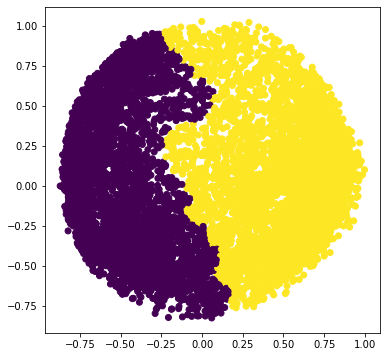

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
ag2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ag2.fit_predict(X_principal), cmap ='viridis')
plt.show()

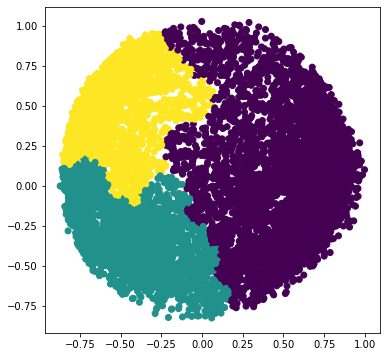

In [12]:
ag3 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ag3.fit_predict(X_principal), cmap ='viridis')
plt.show()

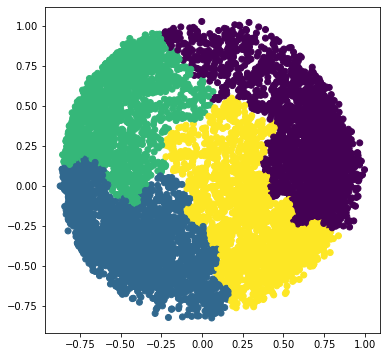

In [13]:
ag4 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ag4.fit_predict(X_principal), cmap ='viridis')
plt.show()

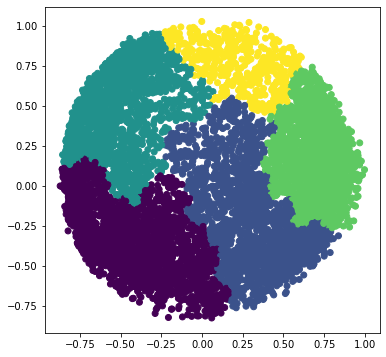

In [14]:
ag5 = AgglomerativeClustering(n_clusters = 5)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ag5.fit_predict(X_principal), cmap ='viridis')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

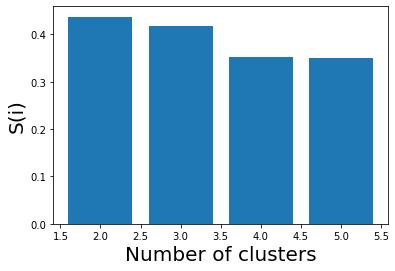

In [16]:
k = [2, 3, 4, 5]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ag2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ag3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ag4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ag5.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()